# Read and write data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('yob2000.txt',header= None)
df.to_csv('new_file',sep=',', index=False, header=['name', 'gender', 'birth'])
df2 = pd.read_csv('new_file')
df2.head(10)

,name,gender,birth
0,Emily,F,25953
1,Hannah,F,23080
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17697
5,Alexis,F,17629
6,Samantha,F,17266
7,Jessica,F,15709
8,Elizabeth,F,15094
9,Taylor,F,15078


# Total births calculation

In [3]:
total_births = df2['birth'].sum()
total_births

3778079

# Separate boys / girls

### Calculate separate sums for boys and girls

In [4]:
boys_girls = df2.groupby('gender')['birth'].sum()
boys_girls

gender
F    1815110
M    1962969
Name: birth, dtype: int64

### Plot both sums in a bar plot

Text(0,0.5,'count')

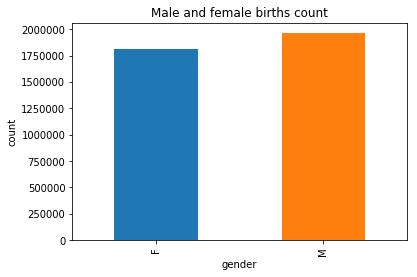

In [5]:
boys_girls.plot.bar()
plt.title('Male and female births count')
plt.ylabel('count')

# Frequent names

In [6]:
frequent_name = df2[df2['birth'] > 1000].count()
frequent_name

name      617
gender    617
birth     617
dtype: int64

# Relative amount

In [7]:
t1 = df2.groupby('name')['birth'].sum()
g1 ={'count' : t1}
df3 = pd.DataFrame(g1)
df4 = df3.reset_index()
df4.head(3)

,name,count
0,Aadam,6
1,Aadarsh,5
2,Aadil,9


### New column containing the percentage of a name on the total births of a given year

In [8]:
df4['percentage'] = (df4['count'])/df4['count'].sum()*100
df4.head(3)

,name,count,percentage
0,Aadam,6,0.000159
1,Aadarsh,5,0.000132
2,Aadil,9,0.000238


### Verify that the sum of percentages is 100%

In [9]:
df4['percentage'].sum()

100.00000000000001

### Calculate the percentage of the top 10 names on all births

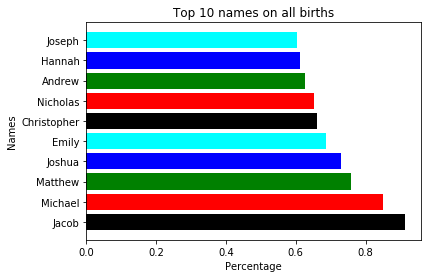

In [10]:
df5 = df4.sort_values(by ='percentage', ascending=False)[:10]
plt.barh(df5['name'],df5['percentage'], color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Top 10 names on all births')
plt.ylabel('Names')
plt.xlabel('Percentage')
plt.show()

# Search your name

In [11]:
df6 = df2[df2['name'].str.startswith('Ahs')]
df6

,name,gender,birth
6486,Ahsley,F,16
10759,Ahsha,F,8
21855,Ahsan,M,18


# Bar plot

Text(0,0.5,'Births count')

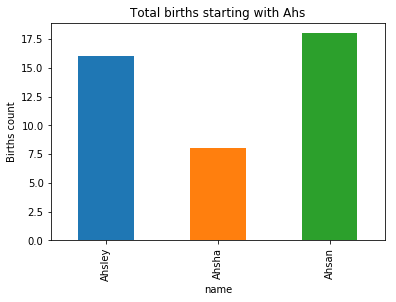

In [12]:
df6.set_index('name',inplace=True)
df6['birth'].plot.bar()
plt.title('Total births starting with Ahs')
plt.ylabel('Births count')

# Read all names

In [13]:
col = ['name', 'gender', 'birth']
years = range(1880, 2017, 10)
data = []
for y in years:
    fn = 'yob{}.txt'.format(y)
    df = pd.read_csv(fn,names = col,header = None)
    df['year'] = y
    data.append(df)
    
df7 = pd.concat(data)
df7.head(3)

,name,gender,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880


# Plot a time series

### Extract all rows containing your name from the variable df

In [14]:
df8 = df7[df7['name'].str.startswith('Ahs') ]
df8

,name,gender,birth,year
3852,Ahsley,F,20,1980
10400,Ahsaki,F,5,1980
2199,Ahsley,F,58,1990
11419,Ahsaki,F,6,1990
19015,Ahsan,M,15,1990
6486,Ahsley,F,16,2000
10759,Ahsha,F,8,2000
21855,Ahsan,M,18,2000
28617,Ahsan,M,8,2010


Text(0,0.5,'Births count')

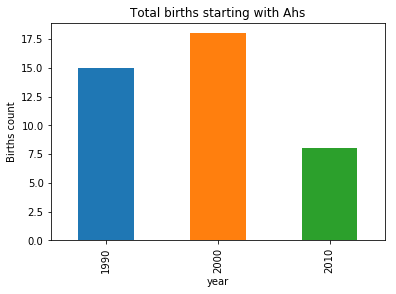

In [15]:
df8_1 = df7[(df7['name'].str.startswith('Ahs') ) & (df7['gender'] == 'M')]

df8_1.set_index('year', inplace=True)
df8_1['birth'].plot.bar()
plt.title('Total births starting with Ahs')
plt.ylabel('Births count')

# Comparison between presidents and actors/actresses names

In [16]:
df9 = df7.loc[df7['name'].isin(['James','Marlon','Paul','Henry','cary','Gerald','Herbert','John','George','Jimmy',
            'Bill','Tom','David'])]
df10 = df9.sort_values(by = 'birth',ascending=False)
df10.head(3)


,name,gender,birth,year
6111,James,M,86239,1950
7331,David,M,85928,1960
6113,John,M,79420,1950


In [17]:
presidents = ['Gerald','Herbert','John','George','Jimmy','Bill','David']
actor = ['James','Marlon','Paul','Henry','cary','Tom']
def categorey(s):
    if s in presidents:
        return 'president'
    elif s in actor:
        return 'actor'
df10['category'] = df10['name'].apply(categorey)
df10.head()

,name,gender,birth,year,category
6111,James,M,86239,1950,actor
7331,David,M,85928,1960,president
6113,John,M,79420,1950,president
7333,James,M,76842,1960,actor
7334,John,M,76096,1960,president


In [18]:
df11= df10.groupby(['category','year'])[['birth']].sum()
df11.head(3)

birth
category year       
actor    1880   9104
         1890   8457
         1900  11683

Text(0,0.5,'Births count')

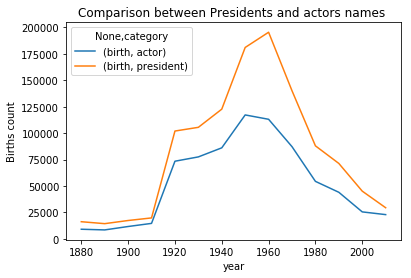

In [19]:
df12 = df11.unstack(0)
df12.plot()
plt.title('Comparison between Presidents and actors names ')
plt.ylabel('Births count')

# Total births over time

### Plot that shows the total birth rate in the U.S. over time

Text(0,0.5,'Births count')

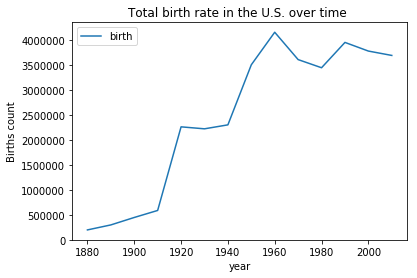

In [20]:
df13 = df7.groupby('year')[['birth']].sum()
df13.plot()
plt.title('Total birth rate in the U.S. over time ')
plt.ylabel('Births count')

###  Birth rate for girls and boys

In [21]:
df14 = df7.groupby(['gender','year'])[['birth']].sum()
df14.head(3)

birth
gender year        
F      1880   90993
       1890  190376
       1900  299800

In [22]:
df15 = df14.unstack(0)
df15.head(3)

birth        
gender       F       M
year                  
1880     90993  110491
1890    190376  111025
1900    299800  150483

Text(0,0.5,'Births count')

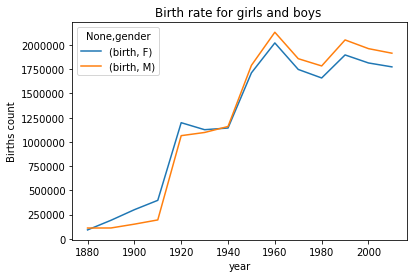

In [23]:
df15.plot()
plt.title('Birth rate for girls and boys ')
plt.ylabel('Births count')

# Normalize

### Divide the number of births by the total number of births in that year to obtain the relative frequency

In [24]:
df16 = df15.stack(0)
df16.head(3)

,gender,F,M
year,,,
1880,birth,90993,110491
1890,birth,190376,111025
1900,birth,299800,150483


In [25]:
df16['totalbirths'] = df16['F'] + df16['M']
df16['F_percentage'] = df16['F'] / df16['totalbirths']*100
df16['M_percentage'] = df16['M'] / df16['totalbirths']*100
df16.head(3)

,gender,F,M,totalbirths,F_percentage,M_percentage
year,,,,,,
1880,birth,90993,110491,201484,45.161402,54.838598
1890,birth,190376,111025,301401,63.163692,36.836308
1900,birth,299800,150483,450283,66.580351,33.419649


Text(0,0.5,'Percentage')

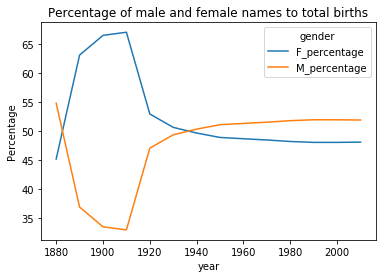

In [26]:
df17 = df16[['F_percentage','M_percentage']].reset_index()
df17.plot(x = 'year')
plt.title('Percentage of male and female names to total births')
plt.ylabel('Percentage')

### Plot the time series of your name or the celebrity names again

Text(0,0.5,'Percentage')

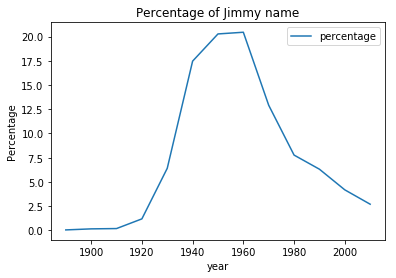

In [27]:
df18 = df7.loc[df7['name'] == 'Jimmy']
df19 = df18.groupby('year')[['birth']].sum()
df19['percentage'] = df19['birth']/df19['birth'].sum()*100
df20 = df19[['percentage']].reset_index()
df20.plot(x = 'year')
plt.title('Percentage of Jimmy name')
plt.ylabel('Percentage')


# Name diversity

In [28]:
df21 = df7.groupby(['year','name','gender' ])[['birth']].sum()
df21.head(3)

birth
year name  gender       
1880 Aaron M         102
     Ab    M           5
     Abbie F          71

In [29]:
df22 =df21.sort_values(['year','birth'],ascending =[True,False])
df22.head()
df22.reset_index(inplace=True)

In [30]:
df22_M= df22[df22['gender'] == 'M']
df22_F= df22[df22['gender'] == 'F']
df22_F.head(3)

,year,name,gender,birth
2,1880,Mary,F,7065
8,1880,Anna,F,2604
14,1880,Emma,F,2003


In [31]:
df22.reset_index(inplace= True)
list_year = df22_M.year.unique()
list_year

array([1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
       1990, 2000, 2010], dtype=int64)

In [32]:
df22_M.set_index('year',inplace = True)
df22_M.head(3)

,name,gender,birth
year,,,
1880,John,M,9655
1880,William,M,9532
1880,James,M,5927


In [33]:
df23= df16.reset_index()
df24 = df23[['year', 'totalbirths']]
df25 = pd.merge(df22_M,df24, how='left', on= 'year')
df25.head(3)


,year,name,gender,birth,totalbirths
0,1880,John,M,9655,201484
1,1880,William,M,9532,201484
2,1880,James,M,5927,201484


In [34]:
df25['Rel.Freq'] = round((df25['birth']/df25['totalbirths']*100),4)
df25.head()

,year,name,gender,birth,totalbirths,Rel.Freq
0,1880,John,M,9655,201484,4.7919
1,1880,William,M,9532,201484,4.7309
2,1880,James,M,5927,201484,2.9417
3,1880,Charles,M,5348,201484,2.6543
4,1880,George,M,5126,201484,2.5441


In [35]:
df25.sort_values(by=['year','Rel.Freq' ], ascending = [True, False], inplace = True)
df25.head()

,year,name,gender,birth,totalbirths,Rel.Freq
0,1880,John,M,9655,201484,4.7919
1,1880,William,M,9532,201484,4.7309
2,1880,James,M,5927,201484,2.9417
3,1880,Charles,M,5348,201484,2.6543
4,1880,George,M,5126,201484,2.5441


In [36]:
df25.set_index('year', inplace = True)
df25.head(3)

,name,gender,birth,totalbirths,Rel.Freq
year,,,,,
1880,John,M,9655,201484,4.7919
1880,William,M,9532,201484,4.7309
1880,James,M,5927,201484,2.9417


In [37]:
test1 = {}

for y in list_year:
    new_df = df25.loc[y]
    a = new_df[:10]['Rel.Freq'].sum()
    test1[y]= a
test1 

{1880: 24.2476,
 1890: 14.1324,
 1900: 11.4356,
 1910: 10.2633,
 1920: 14.8486,
 1930: 16.6418,
 1940: 16.8441,
 1950: 17.2747,
 1960: 14.9299,
 1970: 13.835399999999998,
 1980: 12.219,
 1990: 10.122999999999998,
 2000: 6.947500000000001,
 2010: 4.6532}

In [38]:
df26_M_diversity = pd.DataFrame(list(test1.items()), columns = ['year','Rel.Freq.Top10'])
df26_M_diversity.sort_values(by= 'year',inplace=True)
df26_M_diversity.set_index('year',inplace=True)

Text(0,0.5,'Frequency')

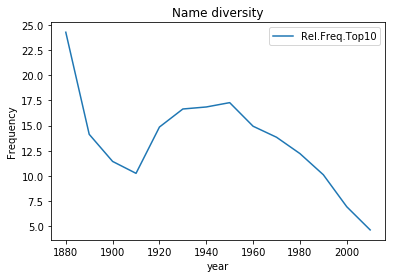

In [39]:
df26_M_diversity['Rel.Freq.Top10']= round(df26_M_diversity['Rel.Freq.Top10'],2)
df26_M_diversity.plot()
plt.title('Name diversity')
plt.ylabel('Frequency')

# Long names

### Add an extra column that contains the length of the name

In [40]:
def longname(s):
    return len(s)
df7['longnames'] = df['name'].apply(longname)
df7.head(3)

,name,gender,birth,year,longnames
0,Mary,F,7065,1880,8
1,Anna,F,2604,1880,6
2,Emma,F,2003,1880,4


### Print the 10 longest names to the screen

In [41]:
df_longnames = df7[['name','longnames']]
df84 = df_longnames.sort_values(by= 'longnames',ascending=False)[:10]
df84

,name,longnames
32385,Christopherjame,15
29677,Christianjoseph,15
29677,Tydarious,15
32935,Jaydenalexander,15
7747,Ralonda,14
12078,Tryone,14
10938,Mariadelcarmen,14
7747,Dirk,14
10938,Hellena,14
12078,Keeana,14


# First letter statistics

In [42]:
def firstletter(s):
    return s[0]

In [43]:
df7['firstletter'] = df7['name'].apply(firstletter)
df7.head(10)

,name,gender,birth,year,longnames,firstletter
0,Mary,F,7065,1880,8,M
1,Anna,F,2604,1880,6,A
2,Emma,F,2003,1880,4,E
3,Elizabeth,F,1939,1880,6,E
4,Minnie,F,1746,1880,3,M
5,Margaret,F,1578,1880,5,M
6,Ida,F,1472,1880,7,I
7,Alice,F,1414,1880,7,A
8,Bertha,F,1320,1880,5,B
9,Sarah,F,1288,1880,3,S


In [44]:
df32 = df7[df7['firstletter'] == 'A']
total_A = df32['firstletter'].count()
total_A

17835

Text(0,0.5,'count')

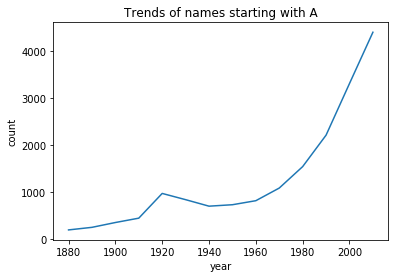

In [45]:
df33 = df32.groupby('year')['firstletter'].count()
df33.plot()
plt.title('Trends of names starting with A')
plt.ylabel('count')

# Last letter statistics

In [46]:
def lastletter(s):
    return s[-1:]
df7['lastletter'] = df7['name'].apply(lastletter)
df7.head(3)

,name,gender,birth,year,longnames,firstletter,lastletter
0,Mary,F,7065,1880,8,M,y
1,Anna,F,2604,1880,6,A,a
2,Emma,F,2003,1880,4,E,a


In [47]:
df34 = df7.loc[df7['lastletter'] == 'a']
df34.head(3)

,name,gender,birth,year,longnames,firstletter,lastletter
1,Anna,F,2604,1880,6,A,a
2,Emma,F,2003,1880,4,E,a
6,Ida,F,1472,1880,7,I,a


In [48]:
df35 = df34.groupby(['year','gender'])['lastletter'].count()
df35.head(3)

year  gender
1880  F         419
      M          31
1890  F         652
Name: lastletter, dtype: int64

Text(0,0.5,'count')

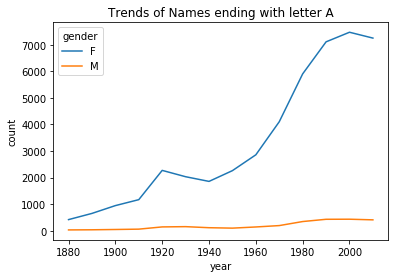

In [49]:
df36 = df35.unstack(1)
df36.plot()
plt.title('Trends of Names ending with letter A')
plt.ylabel('count')

# e-rich Names

### All names that contain the character ‘e’ at least four times

In [50]:
df37 = df7[df7['name'].str.contains("e") & ((df7['name'].str.count("e") >= 4))]
df37.head(3)

,name,gender,birth,year,longnames,firstletter,lastletter
201,Genevieve,F,59,1880,7,G,e
931,Tennessee,F,5,1880,5,T,e
162,Genevieve,F,217,1890,5,G,e


Text(0,0.5,'count')

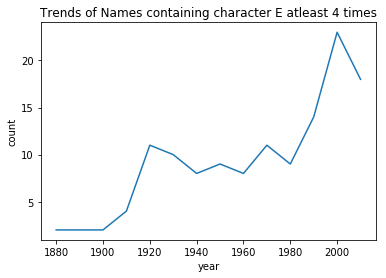

In [57]:
df38 = df37.groupby('year')['name'].count()
df38.plot()
plt.title('Trends of Names containing character E atleast 4 times')
plt.ylabel('count')